In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import scipy.stats as sts
import statsmodels.stats.multitest as smm
%matplotlib inline

plt.rcParams['figure.figsize'] = [10., 8.]

In [38]:
data = pd.read_csv('gene_high_throughput_sequencing.csv')
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


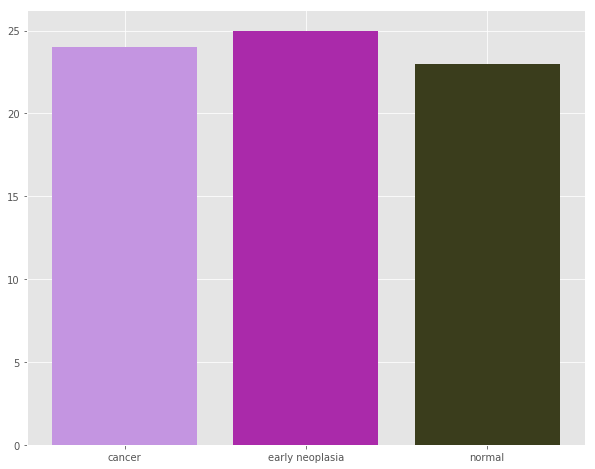

In [46]:
plt.bar(data['Diagnosis'].unique(), data.groupby('Diagnosis')['Patient_id'].count(), color=['#3a3d1c', '#aa2aaa', '#c495e1']);

In [50]:
normal_group = data[data['Diagnosis'] == 'normal']
early_neoplasia_group = data[data['Diagnosis'] == 'early neoplasia']
cancer_group = data[data['Diagnosis'] == 'cancer']

In [143]:
gens = np.array(normal_group.columns[2:])

pvals_normal_early = []
pvals_early_cancer = []

for gen in tqdm_notebook(gens):
    x1 = normal_group[gen].values
    x2 = early_neoplasia_group[gen].values
    x3 = cancer_group[gen].values
    
    pval1 = sts.ttest_ind(x1, x2, equal_var=False)[1]
    pval2 = sts.ttest_ind(x2, x3, equal_var=False)[1]
    pvals_normal_early.append(pval1)
    pvals_early_cancer.append(pval2)
    
pvals_normal_early = np.array(pvals_normal_early)
pvals_early_cancer = np.array(pvals_early_cancer)

In [144]:
(pvals_normal_early < 0.05).sum(), (pvals_early_cancer < 0.05).sum()

(1575, 3490)

In [145]:
pvals_normal_early_corrected = smm.multipletests(pvals_normal_early, alpha=0.025, method='holm')[1]
pvals_early_cancer_corrected = smm.multipletests(pvals_early_cancer, alpha=0.025, method='holm')[1]

In [146]:
def fold_change(treatment, control):
    T = treatment.mean()
    C = control.mean()
    const = 1 if T >= C else -1
    return const * (T / C) ** const

In [147]:
group1_gens = gens[pvals_normal_early_corrected < 0.025]

amount = 0
for gen in group1_gens:
    print(f'Gen: {gen}')
    control = normal_group[gen]
    treatment = early_neoplasia_group[gen]
    f_c = fold_change(treatment, control)
    print(f'Fold Change: {f_c}')
    if abs(f_c) > 1.5:
        amount += 1
print(amount)

Gen: PCSK4
Fold Change: 1.509785482044398
Gen: EEF1A2
Fold Change: 1.9748676656368698
2


In [148]:
group2_gens = gens[pvals_early_cancer_corrected < 0.025]

amount = 0
for gen in group2_gens:
    print(f'Gen: {gen}')
    control = early_neoplasia_group[gen]
    treatment = cancer_group[gen]
    f_c = fold_change(treatment, control)
    print(f'Fold Change: {f_c}')
    if abs(f_c) > 1.5:
        amount += 1
print(amount)

Gen: GABRD
Fold Change: 1.8438601120360605
Gen: EXTL1
Fold Change: -2.383209744151477
Gen: CD164L2
Fold Change: -1.997380740817133
Gen: NES
Fold Change: -1.6934276114377387
Gen: FMO2
Fold Change: -1.795639684357122
Gen: GLT25D2
Fold Change: -2.1195225872289227
Gen: ITIH5
Fold Change: -1.6300230825502284
Gen: HPSE2
Fold Change: -2.449232668410519
Gen: SYT8
Fold Change: -3.0335661559951532
Gen: TNNI2
Fold Change: -2.79378540308933
Gen: ALX4
Fold Change: -2.1259334947698973
Gen: PDGFD
Fold Change: -1.9377959456382414
Gen: CRYAB
Fold Change: -1.6743935503606164
Gen: TRIM29
Fold Change: -2.004977539524381
Gen: WIF1
Fold Change: -4.364839773317585
Gen: TESC
Fold Change: -2.323499626033477
Gen: KLF5
Fold Change: -1.7472427023789792
Gen: SPRY2
Fold Change: -2.045648683740802
Gen: NDRG2
Fold Change: -1.647523947553515
Gen: CMTM5
Fold Change: -2.7369737292912673
Gen: SSTR1
Fold Change: -2.140458355287927
Gen: FBLN5
Fold Change: -1.5488310642781733
Gen: LOC100507043
Fold Change: -2.57649901789038

In [149]:
pvals_normal_early_corrected2 = smm.multipletests(pvals_normal_early, alpha=0.025, method='fdr_bh')[1]
pvals_early_cancer_corrected2 = smm.multipletests(pvals_early_cancer, alpha=0.025, method='fdr_bh')[1]

In [150]:
group1_gens2 = gens[pvals_normal_early_corrected2 < 0.025]

amount = 0
for gen in group1_gens2:
    print(f'Gen: {gen}')
    control = normal_group[gen]
    treatment = early_neoplasia_group[gen]
    f_c = fold_change(treatment, control)
    print(f'Fold Change: {f_c}')
    if abs(f_c) > 1.5:
        amount += 1
print(amount)

Gen: TMEM63C
Fold Change: 1.6638260655780157
Gen: PCSK4
Fold Change: 1.509785482044398
Gen: CACNG8
Fold Change: 1.7549510542769284
Gen: EEF1A2
Fold Change: 1.9748676656368698
4


In [151]:
group2_gens2 = gens[pvals_early_cancer_corrected2 < 0.025]

amount = 0
for gen in group2_gens2:
    control = early_neoplasia_group[gen]
    treatment = cancer_group[gen]
    f_c = fold_change(treatment, control)
    if abs(f_c) > 1.5:
        amount += 1
print(amount)

524
